# Hospital Readmission Risk – Exploratory Data Analysis (EDA)

## Objective
To explore patterns associated with 30-day hospital readmission and identify key variables that may support risk stratification and operational decision-making.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/diabetic_data.csv")

### Dataset Overview

In [66]:
df.shape

(101766, 50)

In [68]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   race                      101766 non-null  str  
 3   gender                    101766 non-null  str  
 4   age                       101766 non-null  str  
 5   weight                    101766 non-null  str  
 6   admission_type_id         101766 non-null  int64
 7   discharge_disposition_id  101766 non-null  int64
 8   admission_source_id       101766 non-null  int64
 9   time_in_hospital          101766 non-null  int64
 10  payer_code                101766 non-null  str  
 11  medical_specialty         101766 non-null  str  
 12  num_lab_procedures        101766 non-null  int64
 13  num_procedures            101766 non-null  int64
 14  num_medications           10176

In [70]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [72]:
df.dtypes.value_counts()

str      37
int64    13
Name: count, dtype: int64

- Dataset contains 101,766 hospital encounters.
- Both categorical and numerical variables are present.
- Target variable: 30-day readmission indicator.

In [78]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='str')

### Target Distribution

In [88]:
print(df["readmitted"].value_counts())
print(df["readmitted"].value_counts(normalize=True))

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64


- I defined 30-day readmission as the target variable, as it represents a clinically and operationally meaningful quality metric. Readmissions occurring beyond 30 days are more likely to reflect new clinical events, whereas those within 30 days often indicate potential issues related to discharge planning, inadequate treatment, medication management failures, or early complications following hospitalization.

In [90]:
# readmitted < 30 : 1, readmitted >= 30 : 0
df["readmit_30"] = df["readmitted"].apply(
    lambda x: 1 if x == "<30" else 0
)

In [92]:
print(df["readmit_30"].value_counts())
print(df["readmit_30"].value_counts(normalize=True))

readmit_30
0    90409
1    11357
Name: count, dtype: int64
readmit_30
0    0.888401
1    0.111599
Name: proportion, dtype: float64


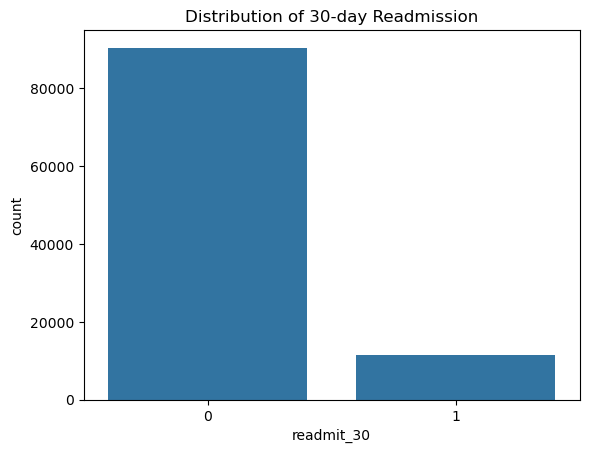

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="readmit_30", data=df)
plt.title("Distribution of 30-day Readmission")
plt.show()

- Dataset is imbalanced.
- Only a minority of patients are readmitted within 30 days.
- This justifies use of class_weight="balanced".

### Age vs Readmission

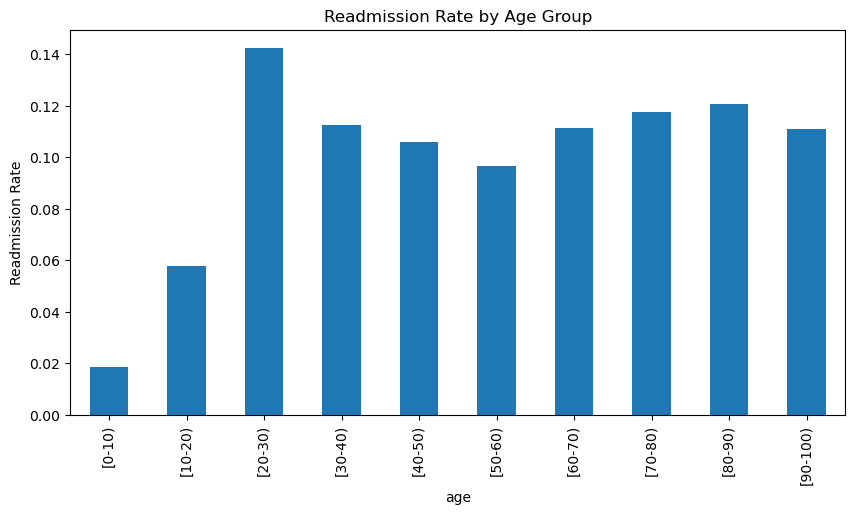

In [99]:
age_readmit = df.groupby("age")["readmit_30"].mean()

age_readmit.plot(kind="bar", figsize=(10,5))
plt.title("Readmission Rate by Age Group")
plt.ylabel("Readmission Rate")
plt.show()

- Although the 20–30 age group shows a relatively high readmission rate, this may be influenced by small sample size or specific high-risk subpopulations rather than representing the general young adult population.
- Therefore, I decided to investigate the actual number of 30-day readmissions in relation to the total sample size for each age group to ensure the observed rates were not driven by small sample effects.

In [104]:
age_counts = df["age"].value_counts().sort_index()
age_readmit_count = df.groupby("age")["readmit_30"].sum()
age_readmit_rate = df.groupby("age")["readmit_30"].mean()

pd.DataFrame({
    "total_count": age_counts,
    "total_readmission_count" : age_readmit_count,
    "readmission_rate": age_readmit_rate
})

,total_count,total_readmission_count,readmission_rate
age,,,
[0-10),161,3,0.018634
[10-20),691,40,0.057887
[20-30),1657,236,0.142426
[30-40),3775,424,0.112318
[40-50),9685,1027,0.106040
[50-60),17256,1668,0.096662
[60-70),22483,2502,0.111284
[70-80),26068,3069,0.117731
[80-90),17197,2078,0.120835


- The 20–30 age group shows the highest 30-day readmission rate (14.2%), although its sample size is relatively small compared to older age groups.
- In contrast, patients aged 70–90 demonstrate consistently elevated readmission rates (11–12%) with substantially larger sample sizes.
- This suggests that while younger patients may exhibit higher proportional risk, older age groups contribute more significantly to the overall readmission burden due to their larger population size.

### Length of Stay (time_in_hospital)

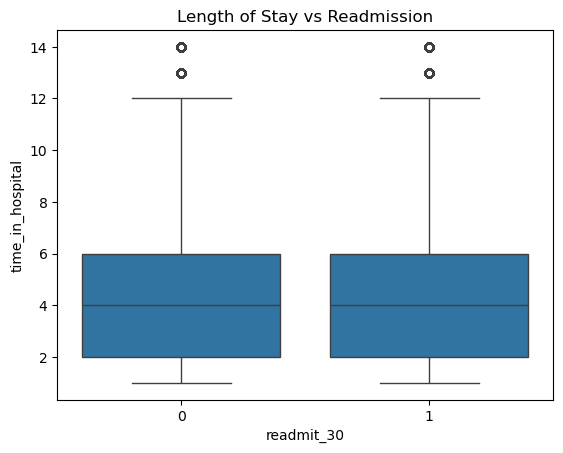

readmit_30
0    4.349224
1    4.768249
Name: time_in_hospital, dtype: float64

In [108]:
sns.boxplot(x="readmit_30", y="time_in_hospital", data=df)
plt.title("Length of Stay vs Readmission")
plt.show()

df.groupby("readmit_30")["time_in_hospital"].mean()

- Patients readmitted within 30 days had a slightly longer average hospital stay (4.77 vs. 4.35 days), suggesting that length of stay may reflect underlying clinical severity or complications associated with higher readmission risk.
- At first glance, the observed difference did not appear substantial; therefore, it was necessary to assess whether the difference was statistically significant. I conducted a hypothesis test to determine whether the average length of stay differed significantly between readmitted and non-readmitted patients, and additionally calculated Cohen’s d to evaluate the practical significance of the effect size.

In [117]:
from scipy import stats

group0 = df[df["readmit_30"] == 0]["time_in_hospital"]
group1 = df[df["readmit_30"] == 1]["time_in_hospital"]

t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -13.92578167265915
P-value: 8.549546879359549e-44


In [119]:
import numpy as np

mean0 = group0.mean()
mean1 = group1.mean()

std0 = group0.std()
std1 = group1.std()

n0 = len(group0)
n1 = len(group1)

pooled_std = np.sqrt(((n0-1)*std0**2 + (n1-1)*std1**2) / (n0+n1-2))

cohens_d = (mean1 - mean0) / pooled_std

print("Cohen's d:", cohens_d)

Cohen's d: 0.14050829950122298


- Although the difference in average length of stay between readmitted and non-readmitted patients is statistically significant (p < 0.001), the effect size is small (Cohen’s d = 0.14), indicating limited practical impact. Length of stay alone is therefore unlikely to strongly predict readmission risk but may contribute when combined with other clinical variables.

### Prior Inpatient Visits

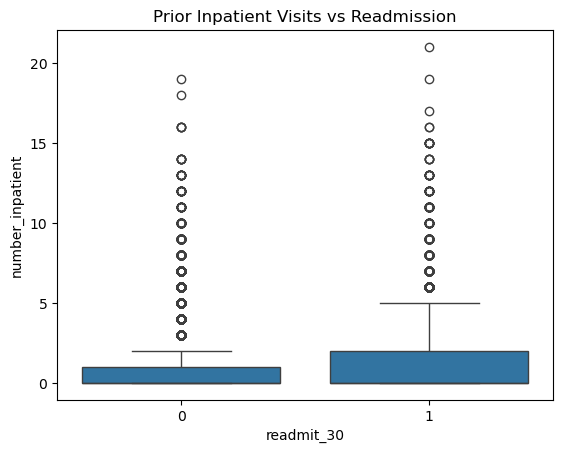

readmit_30
0    0.561648
1    1.224003
Name: number_inpatient, dtype: float64

In [123]:
sns.boxplot(x="readmit_30", y="number_inpatient", data=df)
plt.title("Prior Inpatient Visits vs Readmission")
plt.show()

df.groupby("readmit_30")["number_inpatient"].mean()

- Strong signal observed.
- History of inpatient visits strongly associated with readmission.
- Supports inclusion of utilization history features.

### Clinical Complexity Indicators

#### Medications

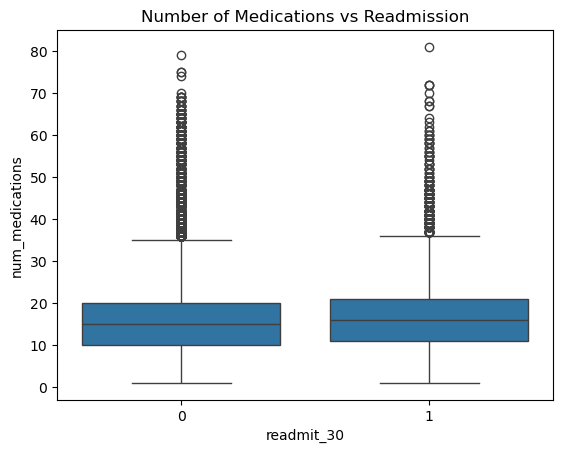

In [125]:
sns.boxplot(x="readmit_30", y="num_medications", data=df)
plt.title("Number of Medications vs Readmission")
plt.show()

#### Lab Procedures

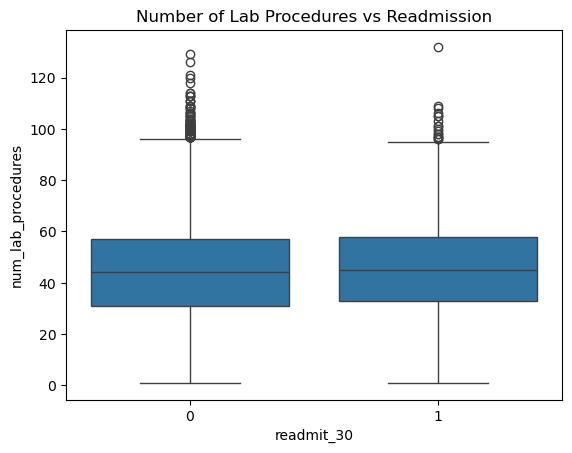

In [127]:
sns.boxplot(x="readmit_30", y="num_lab_procedures", data=df)
plt.title("Number of Lab Procedures vs Readmission")
plt.show()

- Higher number of medications and lab procedures observed among readmitted patients.
- Suggests greater clinical complexity.
- In conclusion, although the distributions of medications and lab procedures overlap substantially between groups, slight upward shifts in the central tendency suggest a weak but consistent association with readmission risk. These variables may not strongly discriminate on their own, but they likely contribute to risk stratification when combined with other clinical factors.

### Correlation (Numerical Only)

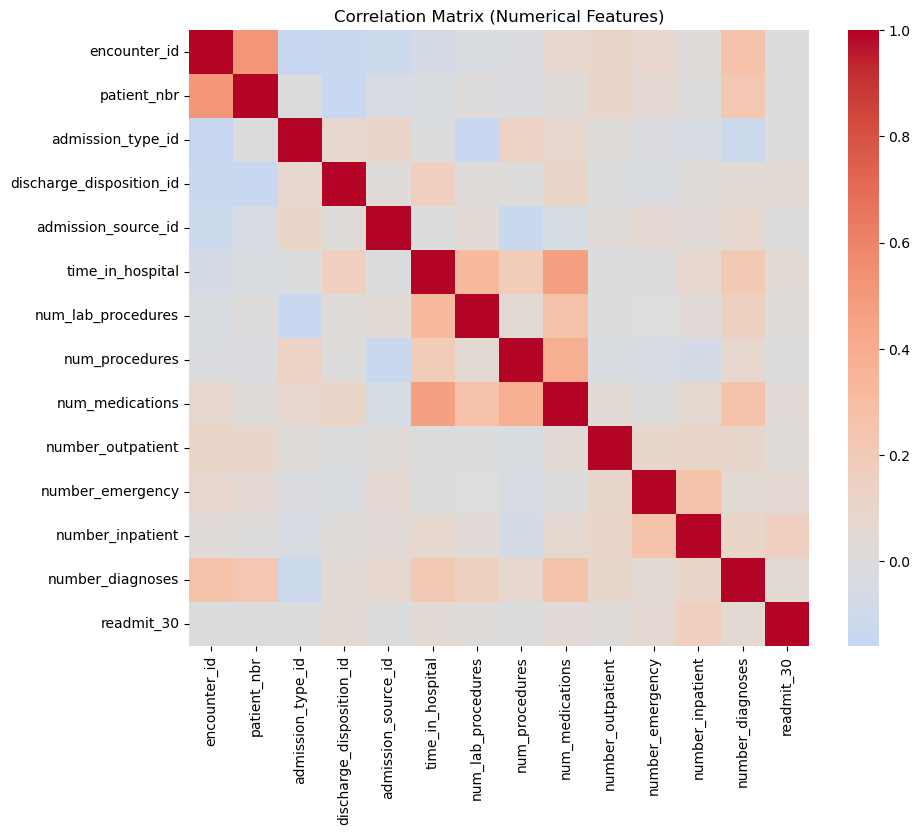

In [130]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

- No extreme multicollinearity observed.
- Several utilization variables show moderate relationships.

## EDA Summary
#### Key findings:

- The dataset is imbalanced, with a minority of patients readmitted within 30 days, necessitating recall-sensitive evaluation and careful threshold selection.
- Age-specific analysis showed that while younger age groups (20–30) exhibited relatively high readmission rates, smaller sample sizes suggest potential statistical variability. In contrast, older age groups (70–90) demonstrated consistently elevated rates with substantially larger populations, contributing more significantly to the overall readmission burden.
- Patients with prior inpatient visits and longer hospital stays were more likely to be readmitted. Although the difference in length of stay was statistically significant, the effect size (Cohen’s d = 0.14) indicates a modest practical impact.
- Higher numbers of medications and laboratory procedures were observed among readmitted patients. While the distributions overlap considerably, slight upward shifts in central tendency suggest a weak but consistent association with readmission risk, likely reflecting increased clinical complexity.
- Overall, individual variables demonstrate modest effects, reinforcing the need for a multivariate modeling approach to capture interactions and nonlinear relationships.
- These findings support the use of machine learning–based risk stratification to identify high-risk patients and inform targeted post-discharge interventions.